# Exploratory Data Analysis

## Preparation

### Required Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

### Import data and conduct necessary checks

In [2]:
# load preprocessed and normalised data 
df_review = pd.read_csv("review.csv")
df_product = pd.read_csv("product.csv")
df_camera_norm = pd.read_csv("review_camera_normalised.csv") 
# df_phone_norm = pd.read_csv("review_phone_normalised.csv")
# df_computer_norm = pd.read_csv("review_computer_normalised.csv")

/var/folders/p7/48zcqw_x76n0z83csbz7s4580000gn/T/ipykernel_44267/637910016.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv("review.csv")
/var/folders/p7/48zcqw_x76n0z83csbz7s4580000gn/T/ipykernel_44267/637910016.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_camera_norm = pd.read_csv("review_camera_normalised.csv")


In [4]:
# show the size of the review dataset
print("The size of the review dataset is: ", df_review.shape)

# show the size of the product dataset
print("The size of the product dataset is: ", df_product.shape)

The size of the review dataset is:  (20566364, 10)
The size of the product dataset is:  (756077, 8)


## All electronic product category review datasets EDA

In [3]:
df_review.head()    

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
0,5.0,True,2002-07-17,0060009810,This was the first time I read Garcia-Aguilera...,NaN,False,2002,11.49,Books
1,5.0,False,2002-07-06,0060009810,"As with all of Ms. Garcia-Aguilera's books, I ...",NaN,False,2002,11.49,Books
2,5.0,False,2002-07-03,0060009810,I've not read any of Ms Aguilera's works befor...,2,False,2002,11.49,Books
3,4.0,False,2002-06-30,0060009810,This romance novel is right up there with the ...,3,False,2002,11.49,Books
4,5.0,False,2002-06-28,0060009810,Carolina Garcia Aguilera has done it again. S...,NaN,False,2002,11.49,Books


### 1. Distribution of Ratings

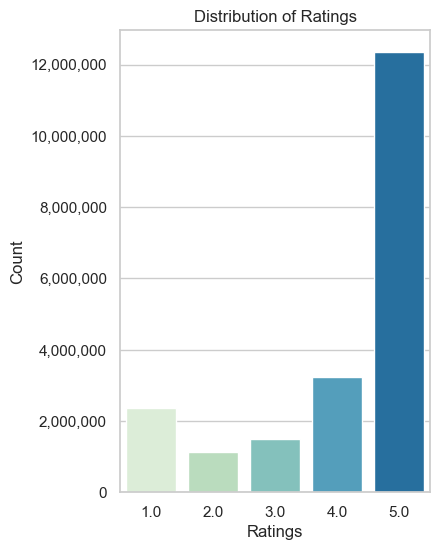

In [9]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(4,6))

sns.countplot(x='overall', data=df_review, palette='GnBu')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()

### 2. Distribution of number of reviews over time

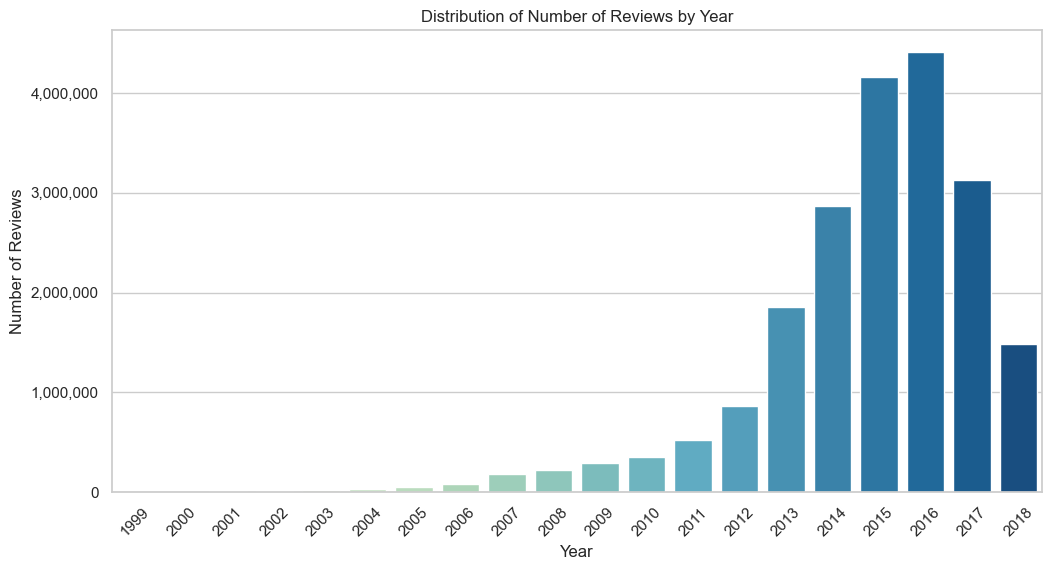

In [123]:
# Filter out the years 1997 and 1998
df_review_filtered = df_review[~df_review['Year'].isin([1997, 1998])]

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df_review_filtered, palette='GnBu')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Number of Reviews by Year')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.show()


### 3. Verified vs. Unverified Reviews

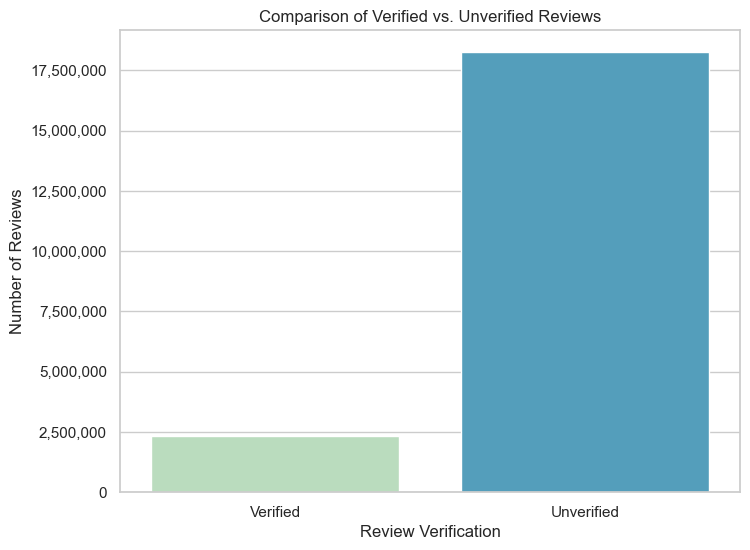

In [6]:
plt.figure(figsize=(8, 6))
verified_counts = df_review['verified'].value_counts()

# Create a bar chart
sns.barplot(x=verified_counts.index, y=verified_counts.values, palette='GnBu')

# Set the labels and title
plt.xlabel('Review Verification')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Verified vs. Unverified Reviews')
plt.xticks([0, 1], ['Verified', 'Unverified'])  # Set custom labels for the x-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.show()

### 4. Correlation of Price and Number of ratings

```
Note: 
- The price data was corrupted which capped at 1000 for all category.
- After investigation, we found that the price data of most Amazom Review datasets in Prof. Julian McAuley UCSD's data repo were corrupted. 
- Source 1: https://nijianmo.github.io/amazon/index.html
- Source 2: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews
```

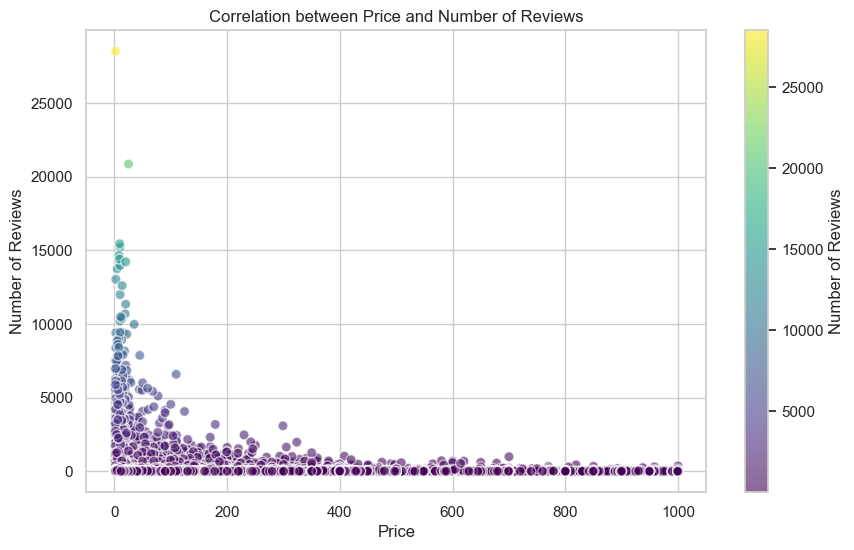

In [7]:
# Group the data by 'asin' and 'price', then count the number of reviews for each group
review_counts_by_price = df_review.groupby(['asin', 'price']).size().reset_index(name='review_count')

plt.figure(figsize=(10,6))
plt.scatter(review_counts_by_price['price'], review_counts_by_price['review_count'], 
            c=review_counts_by_price['review_count'], cmap='viridis', alpha=0.6, edgecolors='w', s=50)  

# Set the labels and title
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')

# Add a colorbar to show the scale of 'review_count'
plt.colorbar(label='Number of Reviews')

# Show the plot
plt.show()

### 5. Correlation between the review text length and ratings

In [8]:
# create a new column 'review_length' to store the length of each review
df_review['review_length'] = df_review['reviewText'].apply(len)

# drop the outliers
df_review_len = df_review[df_review['review_length'] < 1500]

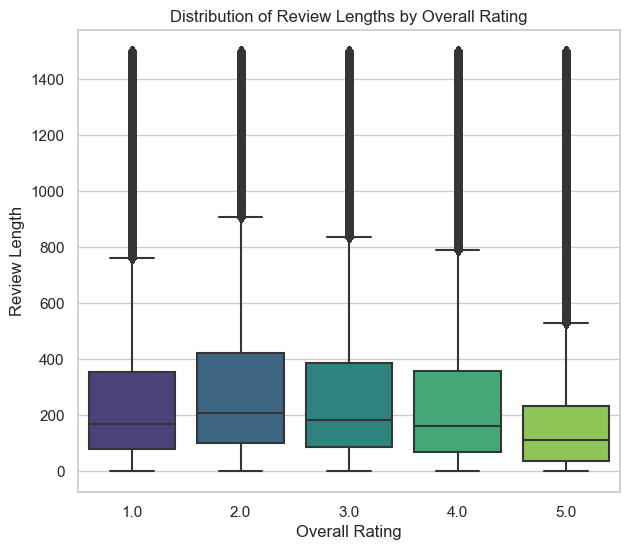

In [9]:
# Use seaborn to create a box plot
plt.figure(figsize=(7,6))
sns.boxplot(x='overall', y='review_length', data=df_review_len, palette='viridis')

# Set the labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Overall Rating')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Show the plot
plt.show()


### 6. Top 10 categories by average price

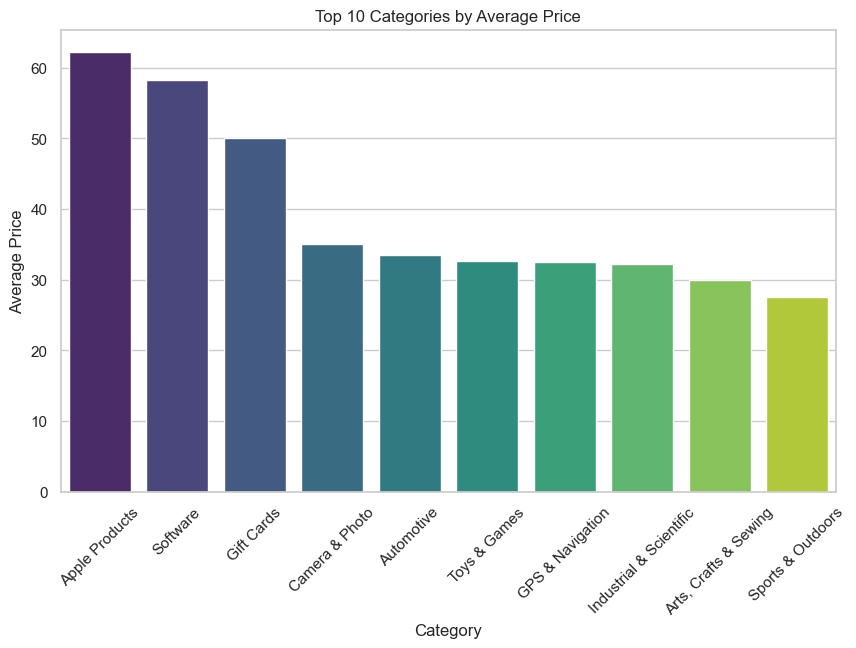

In [17]:
# Calculate the mean price for categories with more than 10 rows
filtered_average_price = df_review.groupby('main_cat').filter(lambda x: len(x) > 10)
average_price = filtered_average_price.groupby('main_cat')['price'].mean().sort_values(ascending=False)

# Show only the top 10 categories
average_price_top10 = average_price.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=average_price_top10.index, y=average_price_top10.values, palette='viridis')

# Set the labels and title
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.title('Top 10 Categories by Average Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



### 7. Top 10 categories by number of reviews

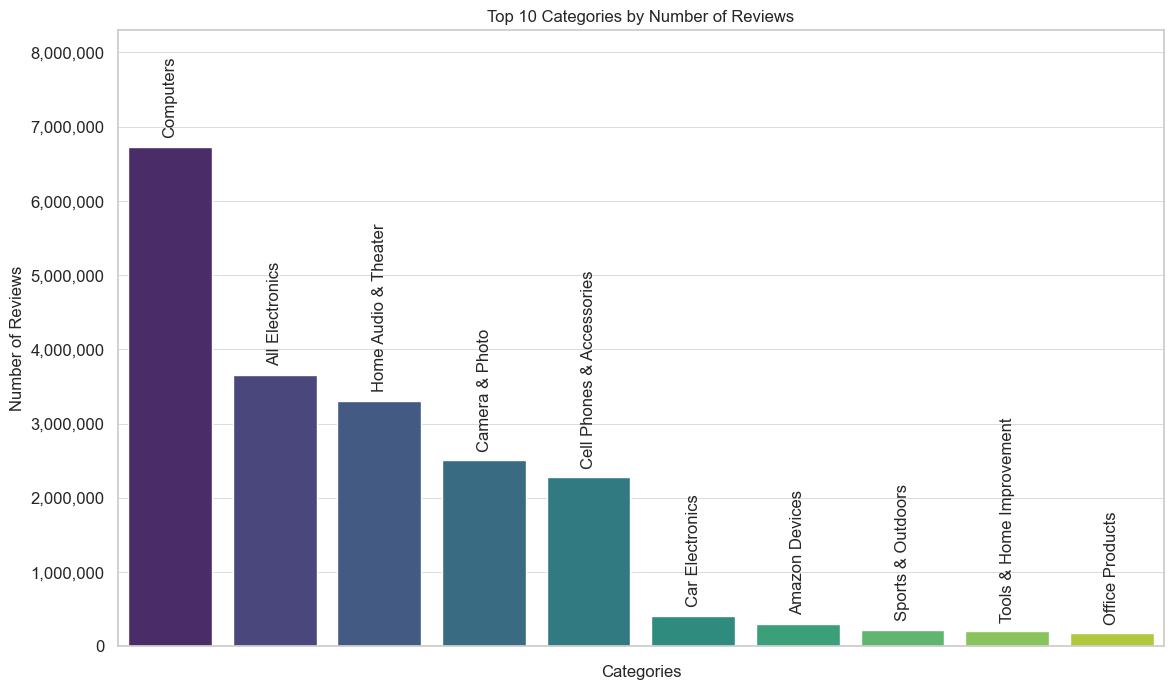

In [155]:
# Get the counts of each main_cat
main_cat_counts = df_review['main_cat'].value_counts()

# Select the top 10 main_cat and sort them by count in descending order
top_10_main_cat = main_cat_counts.head(10).sort_values(ascending=False)

# Plot the distribution of the top 10 main_cat
plt.figure(figsize=(13.5,8))
ax = sns.countplot(x='main_cat', data=df_review[df_review['main_cat'].isin(top_10_main_cat.index)], palette='viridis', order=top_10_main_cat.index)
plt.title('Top 10 Categories by Number of Reviews', fontsize=12)
plt.xlabel('Categories', fontsize=12) 
plt.ylabel('Number of Reviews', fontsize=12) 
ax.set_ylim([0, 8300000])  # Set the maximum y-axis limit
ax.set_xticklabels([])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.yaxis.set

offset = 120000
for p, label in zip(ax.patches, top_10_main_cat.index):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + offset, label,
            fontsize=12, ha='center', va='bottom', rotation=90)

ax.tick_params(axis='y', labelsize=12)

plt.grid(axis='y', linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

plt.show()


### 8. Average Rating by Year

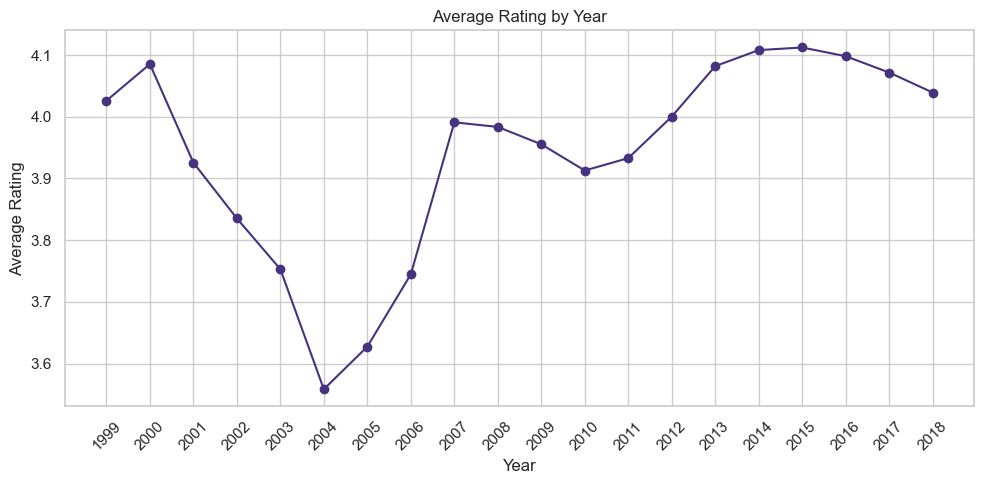

In [45]:
df_avg_rating = df_review.groupby('Year')['overall'].mean()
df_avg_rating.drop([1997, 1998], inplace=True)
plt.figure(figsize=(10, 5))  # Optional: Adjusts the size of the figure
plt.plot(df_avg_rating.index.astype(int), df_avg_rating, marker='o', color=sns.color_palette('viridis')[0])  # Ensure index is integer
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.xticks(df_avg_rating.index.astype(int), rotation=45)  # Ensure x-ticks are integer years and rotate for better visibility

plt.grid(True)  
plt.tight_layout() 
plt.show()


### 9. Distribution of Ratings Over Time

In [46]:
# create a new df without 1997 and 1998
df_review_filtered = df_review[~df_review['Year'].isin([1997, 1998])]

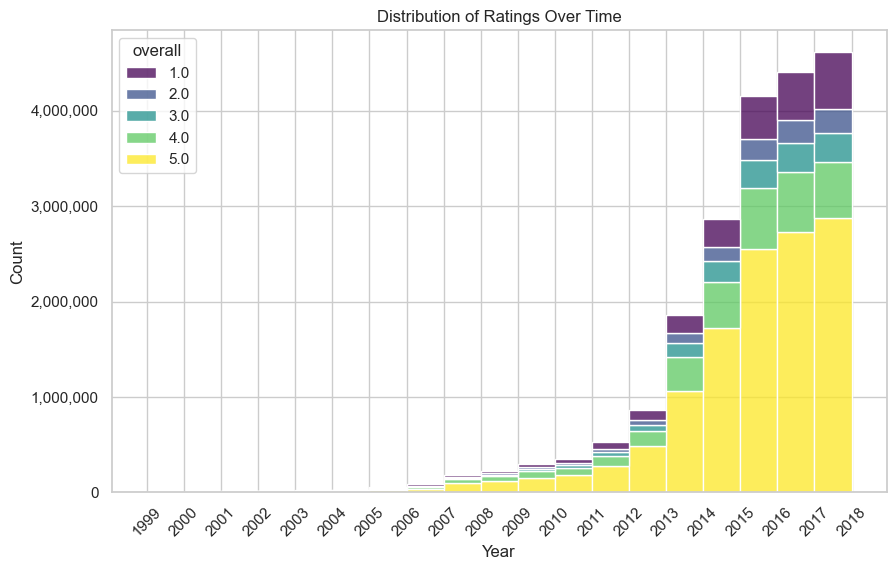

In [122]:
plt.figure(figsize=(10, 6))  
sns.histplot(
    data=df_review_filtered,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis",
    edgecolor="white",
    multiple="stack",
)
plt.title("Distribution of Ratings Over Time")

# Adjust the x-axis ticks to display only integer years
plt.xticks(np.arange(min(df_review_filtered['Year']), max(df_review_filtered['Year'])+1, 1), rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xlabel('Year')

plt.show()


## Camera Review Dataset EDA

In [48]:
df_camera_norm.head()

,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat
0,5.0,True,2010-05-15,5135000011,skeptical buy generic replacement battery new ...,4,False,2010,NaN,Camera & Photo
1,5.0,True,2010-02-03,5135000011,battery arrive ahead schedule price anyplace b...,4,False,2010,NaN,Camera & Photo
2,5.0,True,2009-05-16,5135000011,muy importante tener una batera cargada de rep...,2,False,2009,NaN,Camera & Photo
3,5.0,True,2014-05-16,5135000011,rechargeable battery pack order work great cam...,NaN,False,2014,NaN,Camera & Photo
4,5.0,True,2014-04-07,5135000011,battery charge quickly instal camera easily gr...,NaN,False,2014,NaN,Camera & Photo


In [27]:
# create a df without 1998
df_camera_filtered = df_camera_norm[~df_camera_norm['Year'].isin([1998])]


### 1. Overall Rating Distribution

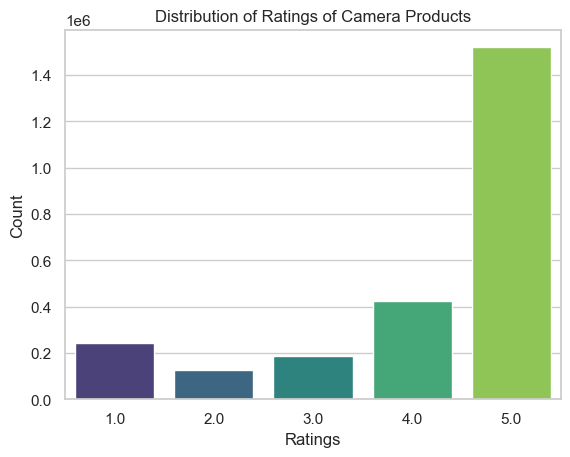

In [50]:
sns.countplot(x='overall', data=df_camera_norm, palette='viridis')

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings of Camera Products')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()


### 2. Distribution of Ratings Over Time

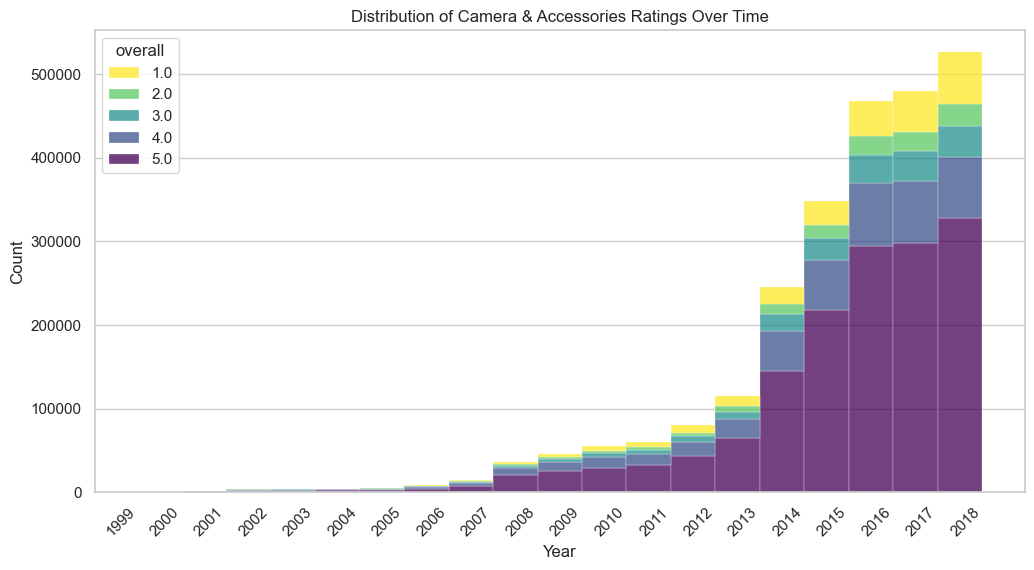

In [99]:
plt.figure(figsize=(12, 6))  
sns.histplot(
    data=df_camera_filtered,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis_r",
    edgecolor="white",
    multiple="stack",
    linewidth=0.2,
)
plt.title("Distribution of Camera & Accessories Ratings Over Time")

# Adjust the x-axis ticks to display only integer years
plt.xticks(np.arange(min(df_camera_filtered['Year']), max(df_camera_filtered['Year'])+1, 1), rotation=45, ha='right')
plt.xlabel('Year')

plt.grid(axis='x')

plt.show()

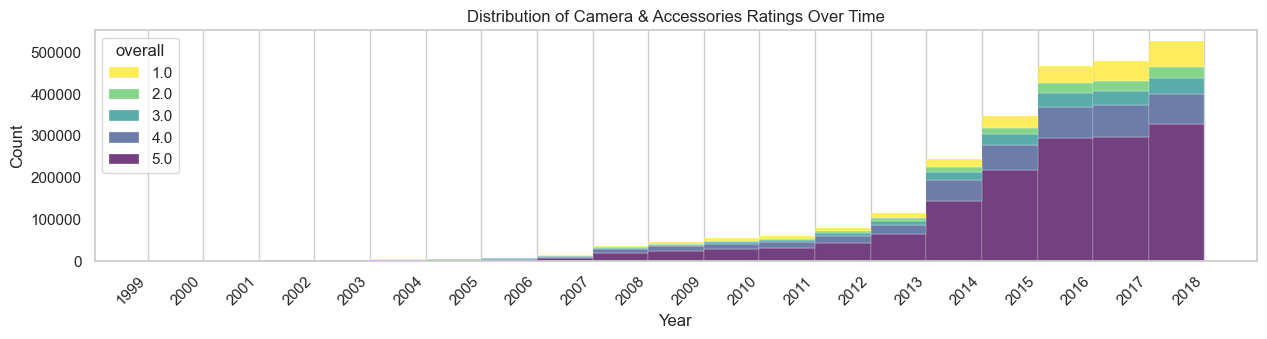

In [101]:

plt.figure(figsize=(15, 3))  
sns.histplot(
    data=df_camera_filtered,
    x="Year",
    hue="overall",
    bins=19,
    palette="viridis_r",
    edgecolor="white",
    multiple="stack",
    linewidth=0.2,
)
plt.title("Distribution of Camera & Accessories Ratings Over Time")

# Adjust the x-axis ticks to display only integer years
plt.xticks(np.arange(min(df_camera_filtered['Year']), max(df_camera_filtered['Year'])+1, 1), rotation=45, ha='right')
plt.xlabel('Year')

plt.grid(axis='y')

plt.show()


### 3. Average Rating by year

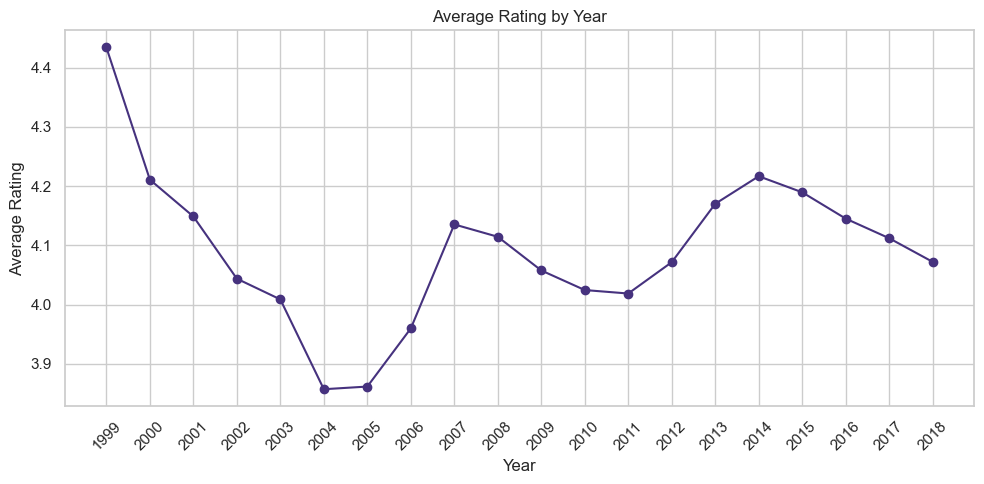

In [19]:
df_avg_rating_camera = df_camera_filtered.groupby('Year')['overall'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg_rating_camera.index.astype(int), df_avg_rating_camera, marker='o', color=sns.color_palette('viridis')[0]) 
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.xticks(df_avg_rating_camera.index.astype(int), rotation=45) 

plt.grid(True)  
plt.tight_layout() 
plt.show()

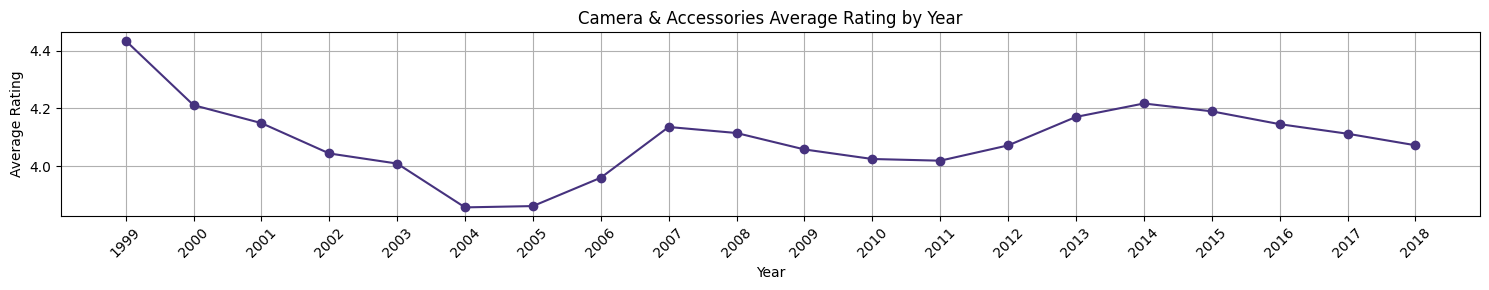

In [28]:
df_avg_rating_camera = df_camera_filtered.groupby('Year')['overall'].mean()

plt.figure(figsize=(15, 3))
plt.plot(df_avg_rating_camera.index.astype(int), df_avg_rating_camera, marker='o', color=sns.color_palette('viridis')[0]) 
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Camera & Accessories Average Rating by Year')
plt.xticks(df_avg_rating_camera.index.astype(int), rotation=45) 

plt.grid(True)  
plt.tight_layout() 
plt.show()

### 4. Average Review length by Year

In [110]:
# check the type of reviewText
type(df_camera_norm['reviewText'][0])
# convert all reviewText to string
df_camera_norm['reviewText'] = df_camera_norm['reviewText'].astype(str)
# start from year 1999
df_camera_filtered_len = df_camera_norm[~df_camera_norm['Year'].isin([1998])]

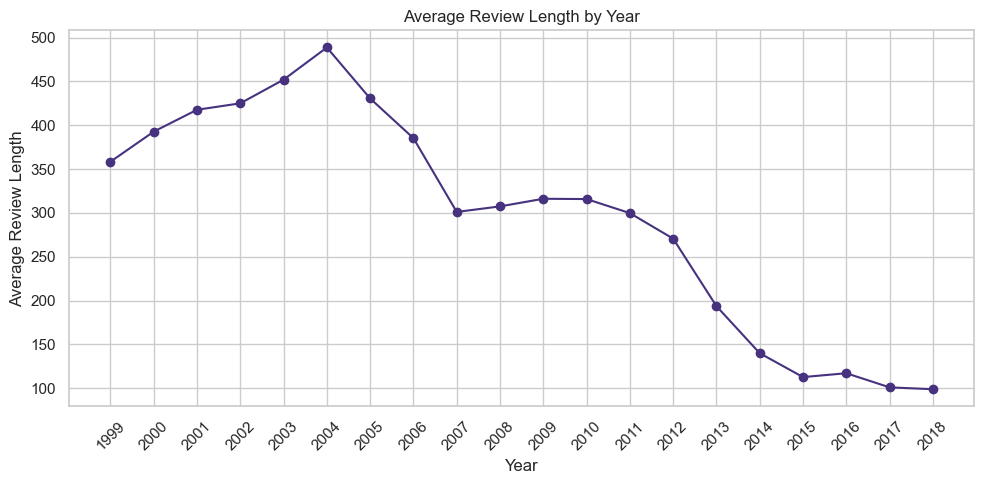

In [39]:
df_avg_review_length = df_camera_filtered_len.groupby('Year')['review_length'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_avg_review_length.index.astype(int), df_avg_review_length, marker='o', color=sns.color_palette('viridis')[0]) 
plt.xlabel('Year')
plt.ylabel('Average Review Length')
plt.title('Average Review Length by Year')
plt.xticks(df_avg_review_length.index.astype(int), rotation=45) 

plt.grid(True)  
plt.tight_layout() 
plt.show()

### 5. Correlation between the review text length and ratings

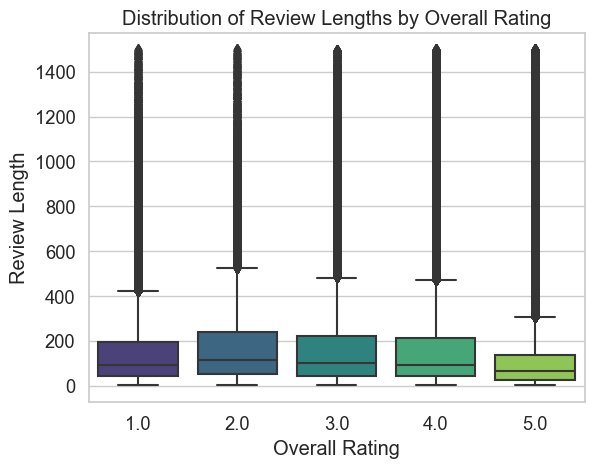

In [111]:
# Create a new column 'review_length' to store the length of each review
df_camera_norm['review_length'] = df_camera_norm['reviewText'].apply(len)

# Drop the outliers
df_camera_len = df_camera_norm[df_camera_norm['review_length'] < 1500]

# Use seaborn to create a box plot
sns.boxplot(x='overall', y='review_length', data=df_camera_len, palette='viridis')

# Set the labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Overall Rating')

# Show the plot
plt.show()


### 6. Correlation between rating and vote

In [129]:
# create a new column is_voted, if the vote is NaN, then is_voted is 0, otherwise 1
df_camera_norm['is_voted'] = df_camera_norm['vote'].apply(lambda x: 0 if pd.isna(x) else 1)
df_camera_norm.head()   


,overall,verified,reviewTime,asin,reviewText,vote,image,Year,price,main_cat,review_length,is_voted
0,5.0,True,2010-05-15,5135000011,skeptical buy generic replacement battery new ...,4,False,2010,NaN,Camera & Photo,260,1
1,5.0,True,2010-02-03,5135000011,battery arrive ahead schedule price anyplace b...,4,False,2010,NaN,Camera & Photo,89,1
2,5.0,True,2009-05-16,5135000011,muy importante tener una batera cargada de rep...,2,False,2009,NaN,Camera & Photo,117,1
3,5.0,True,2014-05-16,5135000011,rechargeable battery pack order work great cam...,NaN,False,2014,NaN,Camera & Photo,137,0
4,5.0,True,2014-04-07,5135000011,battery charge quickly instal camera easily gr...,NaN,False,2014,NaN,Camera & Photo,95,0


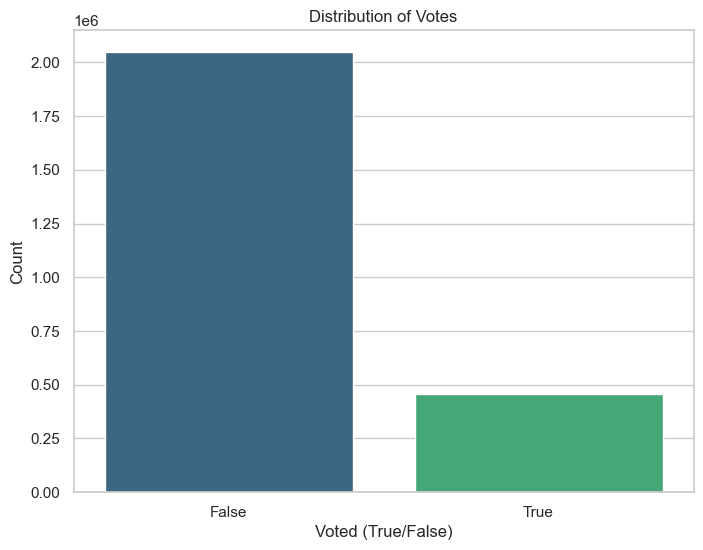

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_voted', data=df_camera_norm, palette='viridis')
plt.title('Distribution of Votes')
plt.xlabel('Voted (True/False)')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['False', 'True'])

plt.show()


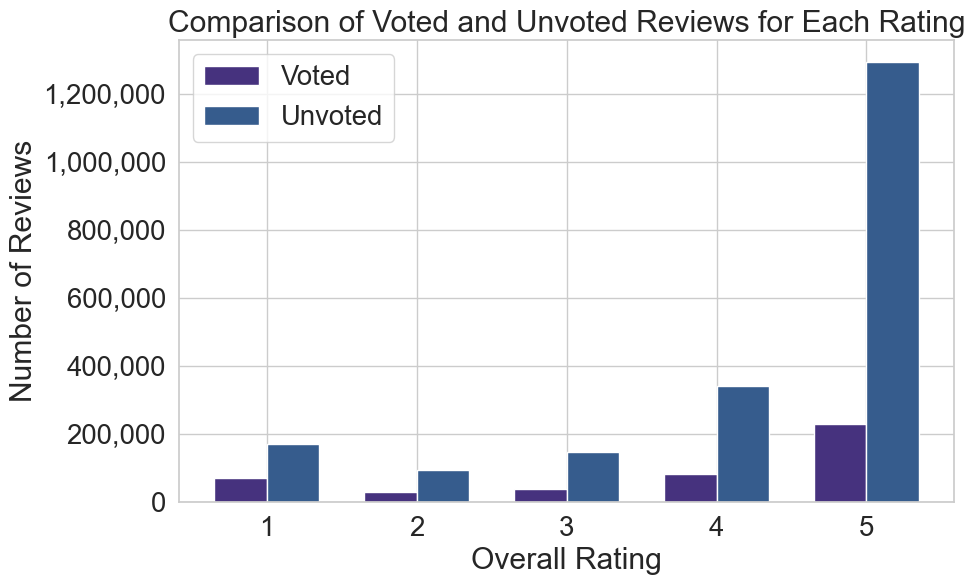

In [131]:

voted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == True].groupby('overall')['is_voted'].count()
unvoted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == False].groupby('overall')['is_voted'].count()

# Plot the number of voted and unvoted reviews for each rating
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = voted_reviews_count.index
plt.bar(index - bar_width/2, voted_reviews_count.values, bar_width, label='Voted', color=sns.color_palette('viridis')[0])
plt.bar(index + bar_width/2, unvoted_reviews_count.values, bar_width, label='Unvoted', color=sns.color_palette('viridis')[1])

# Set labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.title('Comparison of Voted and Unvoted Reviews for Each Rating')
plt.xticks(index)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.legend()

plt.show()



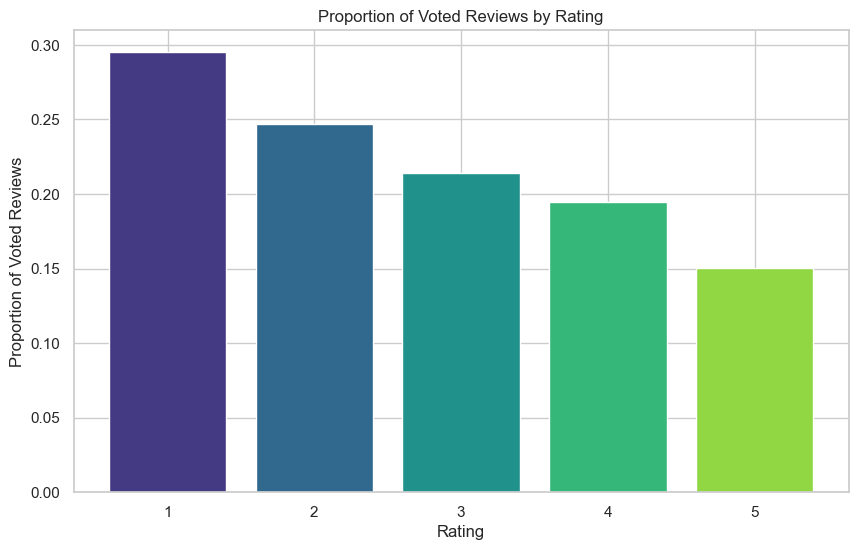

In [44]:
df_camera_norm['is_voted'] = df_camera_norm['vote'].notnull()

# Calculate the count of voted and unvoted reviews per rating
voted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == True].groupby('overall')['is_voted'].count()
unvoted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == False].groupby('overall')['is_voted'].count()

# Handle potential division by zero by adding a small number (e.g., 1e-10) to the denominator
voted_proportion = voted_reviews_count / (voted_reviews_count + unvoted_reviews_count + 1e-10)

# Plot the proportion of voted reviews for each rating
plt.figure(figsize=(10, 6))
plt.bar(voted_proportion.index, voted_proportion.values, color=sns.color_palette('viridis', len(voted_proportion)))
plt.title('Proportion of Voted Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Voted Reviews')
plt.show()



In [52]:
# check the type of vote
type(df_camera_norm['vote'][0])
# convert all vote to int, convert NaN to 0
# Fill NaN values with 0
df_camera_norm['vote'] = df_camera_norm['vote'].fillna(0)
# Convert all 'vote' values to floats, then to integers
df_camera_norm['vote'] = df_camera_norm['vote'].astype(float).astype(int)


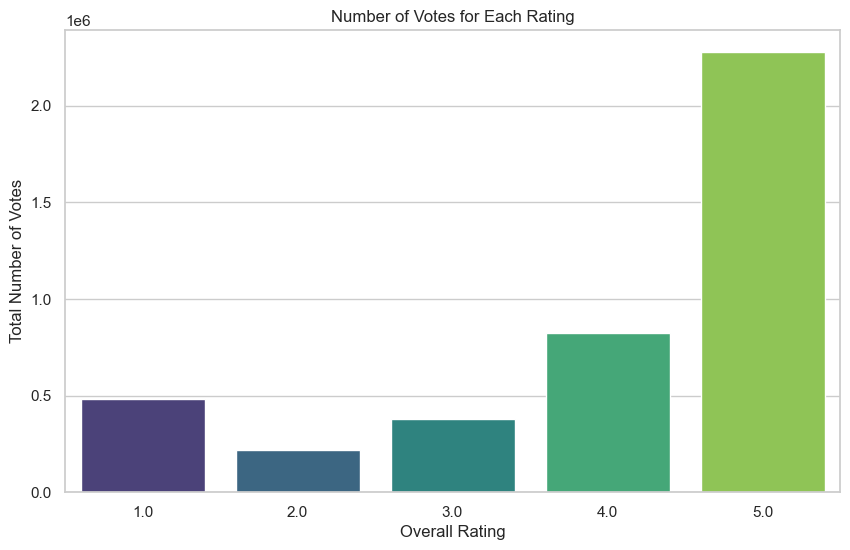

In [53]:
# Group the data by 'overall' rating and sum the number of votes for each rating
votes_by_rating = df_camera_norm.groupby('overall')['vote'].sum()

# Plot the number of votes for each rating
plt.figure(figsize=(10, 6))
sns.barplot(x=votes_by_rating.index, y=votes_by_rating.values, palette='viridis')
plt.title('Number of Votes for Each Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Total Number of Votes')

plt.show()


### 7. Correlation between image and vote

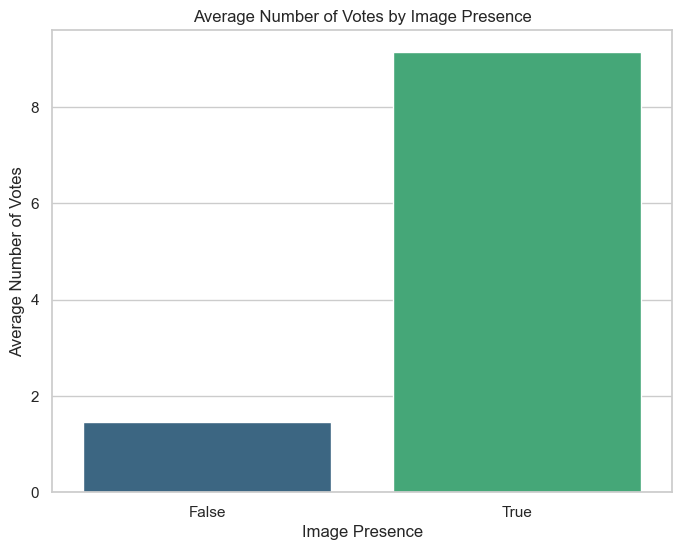

In [54]:
# Group the data by 'image' column and calculate the average number of votes for each group
average_votes_by_image = df_camera_norm.groupby('image')['vote'].mean()

# Plot the average number of votes for reviews with and without images
plt.figure(figsize=(8, 6))
sns.barplot(x=average_votes_by_image.index, y=average_votes_by_image.values, palette='viridis')
plt.title('Average Number of Votes by Image Presence')
plt.xlabel('Image Presence')
plt.ylabel('Average Number of Votes')
plt.show()


### 8. Correlation between review text length and vote

In [132]:
# convert the 'reviewText' column to string
df_camera_norm['reviewText'] = df_camera_norm['reviewText'].astype(str)

# create a new column 'review_length' to store the length of each review
df_camera_norm['review_length'] = df_camera_norm['reviewText'].apply(len)

# drop the outliers
df_camera_len = df_camera_norm[df_camera_norm['review_length'] < 1500]

In [137]:
df_camera_len['vote'] = pd.to_numeric(df_camera_norm['vote'], errors='coerce')

/var/folders/p7/48zcqw_x76n0z83csbz7s4580000gn/T/ipykernel_44267/456559981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_camera_len['vote'] = pd.to_numeric(df_camera_norm['vote'], errors='coerce')


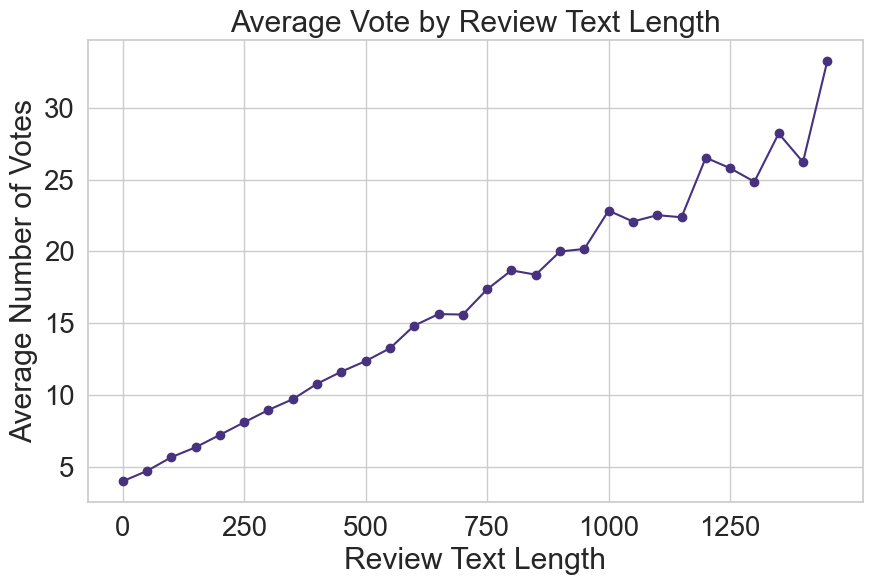

In [138]:
bins = np.arange(0, df_camera_len['review_length'].max() + 50, 50)

average_vote_by_length = df_camera_len.groupby(pd.cut(df_camera_len['review_length'], bins=bins))['vote'].mean()

plt.figure(figsize=(10, 6))
average_vote_by_length.plot(marker='o', color=sns.color_palette('viridis')[0])  
plt.title('Average Vote by Review Text Length')
plt.xlabel('Review Text Length')
plt.ylabel('Average Number of Votes')
plt.grid(True)

plt.xticks(range(0, len(average_vote_by_length), 5), bins[:-1:5])

plt.show()


### 9. Proportion of Reviews with Images by Rating

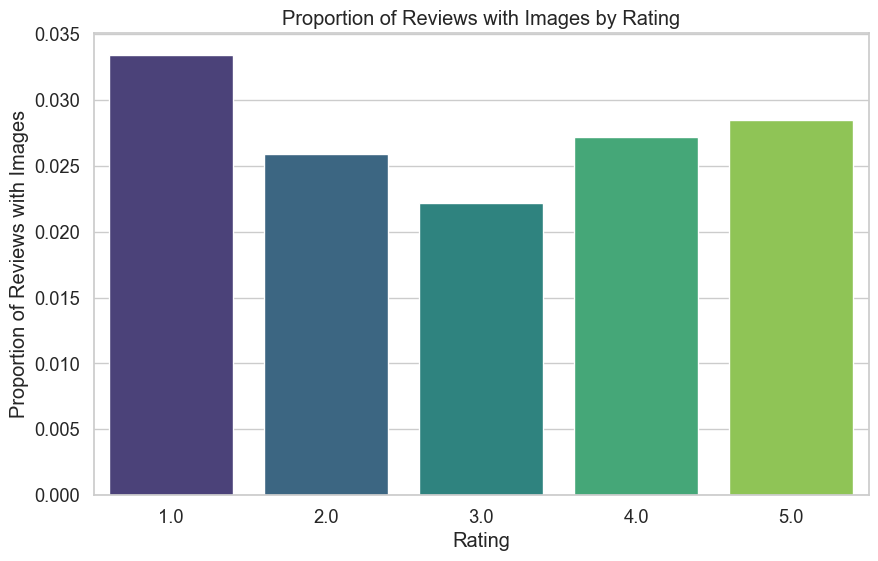

In [112]:
# Group the dataset by 'overall' rating and aggregate the 'image' column to find the sum (number of images) and size (total reviews) for each rating group
grouped = df_camera_norm.groupby('overall')['image'].agg(['sum', 'size'])
grouped['image_ratio'] = grouped['sum'] / grouped['size']

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped.index, y=grouped['image_ratio'], palette='viridis')
plt.title('Proportion of Reviews with Images by Rating')
plt.xlabel('Rating')
plt.ylabel('Proportion of Reviews with Images')
plt.show()


### 10. Number of reviews by year

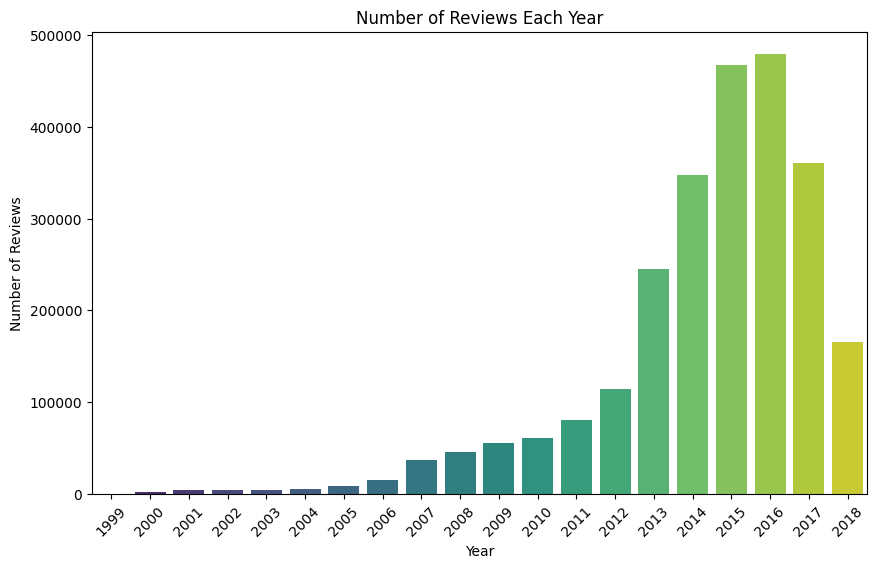

In [29]:
yearly_review_counts = df_camera_filtered.groupby('Year').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_review_counts.index, y=yearly_review_counts.values, palette="viridis")
plt.title("Number of Reviews Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


### PPT Sldies Plot - 1


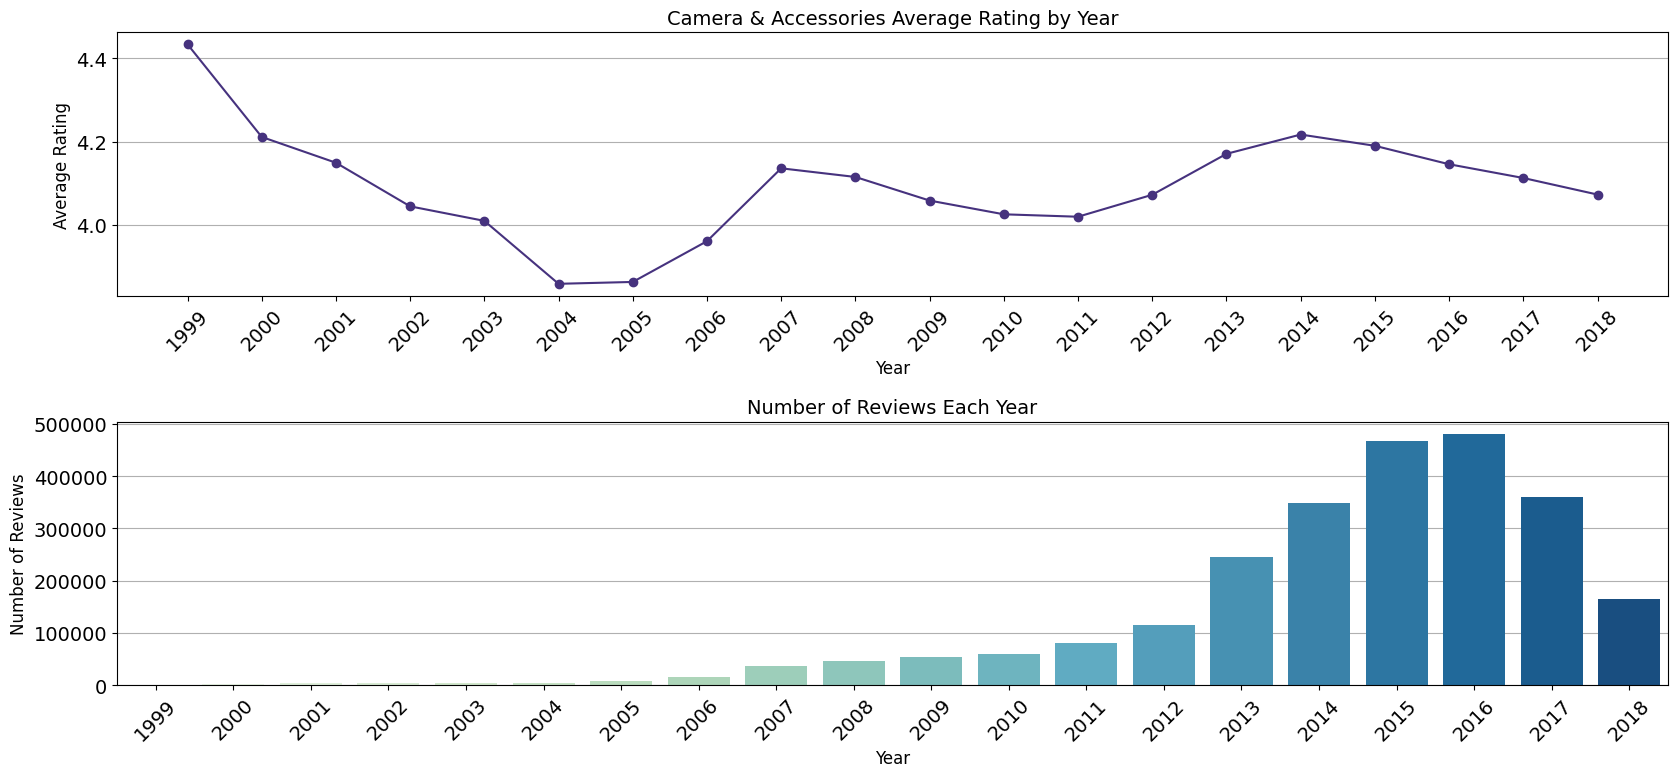

In [107]:

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(17, 8))

# Plot first graph (average rating)
axs[0].plot(df_avg_rating_camera.index.astype(int), df_avg_rating_camera, marker='o', color=sns.color_palette('viridis')[0])
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Average Rating', fontsize=12)
axs[0].set_title('Camera & Accessories Average Rating by Year', fontsize=14)
axs[0].set_xticks(df_avg_rating_camera.index.astype(int))
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y')

# Plot second graph (review counts)
sns.barplot(x=yearly_review_counts.index, y=yearly_review_counts.values, palette='GnBu', ax=axs[1])
axs[1].set_title("Number of Reviews Each Year", fontsize=14)
axs[1].set_xlabel("Year", fontsize=12)
axs[1].set_ylabel("Number of Reviews", fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
plt.grid(axis='y', linestyle='-', zorder=0)
plt.gca().set_axisbelow(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### PPT Sldies Plot - 2

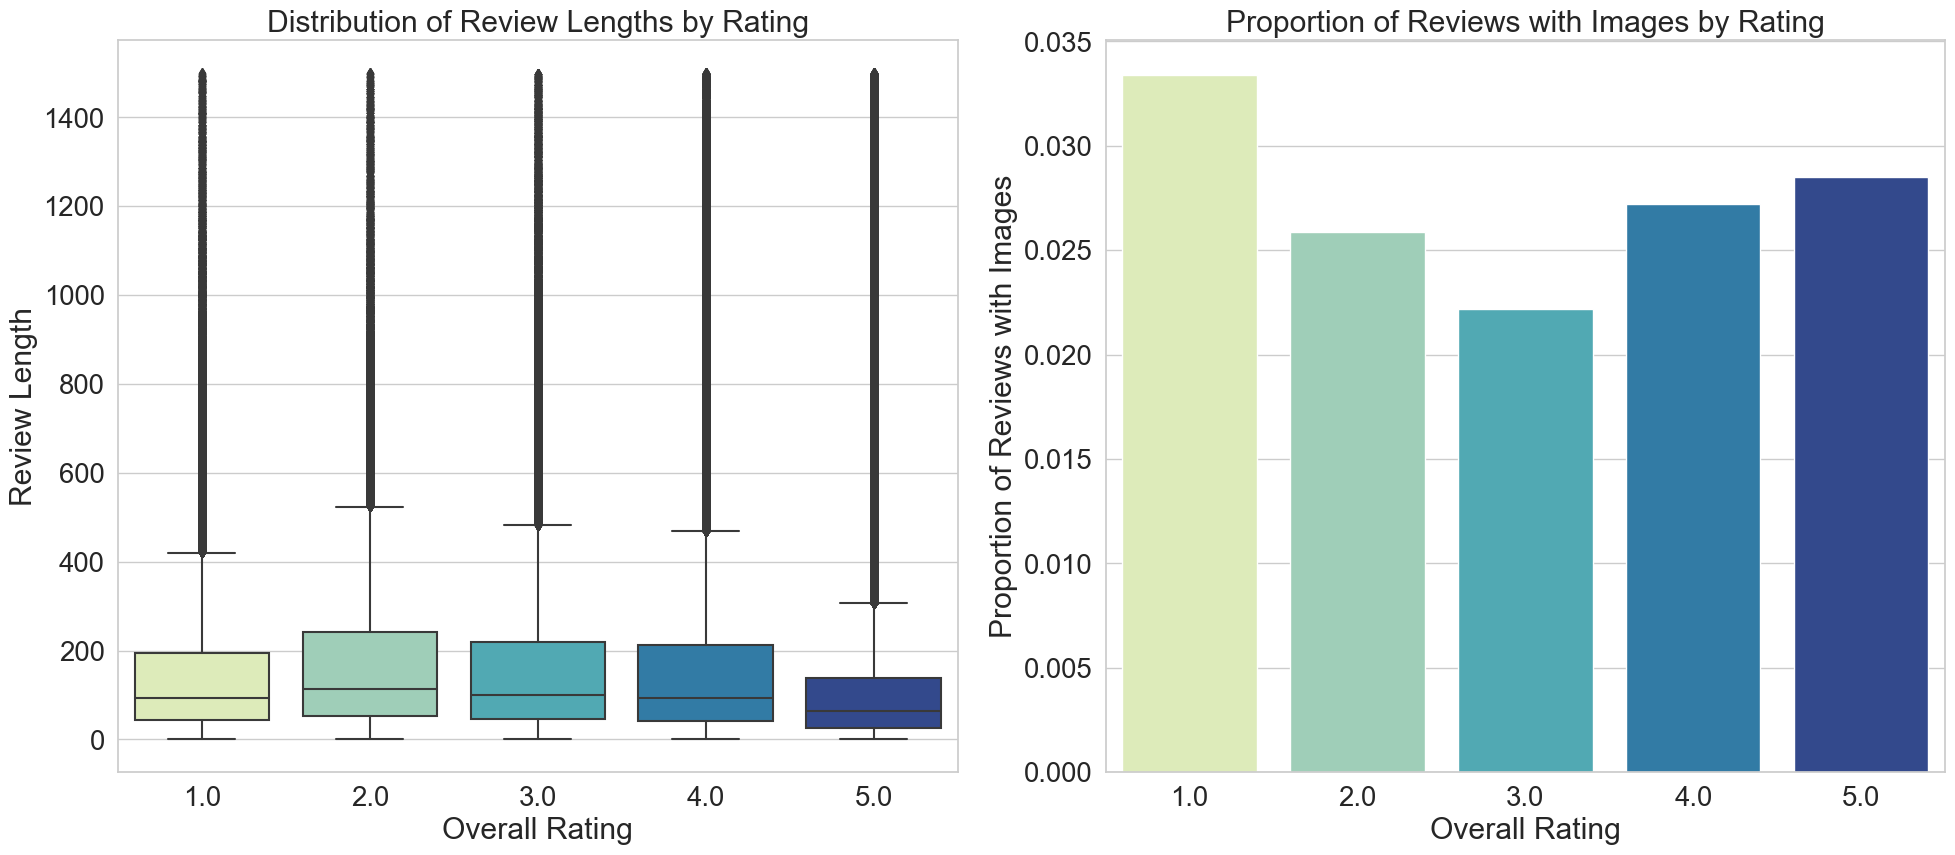

In [120]:
# Set the seaborn style and font scale for larger fonts
sns.set(style="whitegrid", font_scale=1.8)

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))  # Adjusted for side-by-side subplots

# Create a new column 'review_length' to store the length of each review
df_camera_norm['review_length'] = df_camera_norm['reviewText'].apply(len)

# Drop the outliers
df_camera_len = df_camera_norm[df_camera_norm['review_length'] < 1500]

# First Subplot: Box plot of review lengths by overall rating
sns.boxplot(x='overall', y='review_length', data=df_camera_len, palette='YlGnBu', ax=ax1)

# Set the labels and title for the first subplot
ax1.set_xlabel('Overall Rating')
ax1.set_ylabel('Review Length')
ax1.set_title('Distribution of Review Lengths by Rating')

# Second Subplot: Bar plot of the proportion of reviews with images by rating
# Group the dataset by 'overall' rating and aggregate the 'image' column to find the sum (number of images) and size (total reviews) for each rating group
grouped = df_camera_norm.groupby('overall')['image'].agg(['sum', 'size'])
grouped['image_ratio'] = grouped['sum'] / grouped['size']

sns.barplot(x=grouped.index, y=grouped['image_ratio'], palette='YlGnBu', ax=ax2)

# Set the labels and title for the second subplot
ax2.set_title('Proportion of Reviews with Images by Rating')
ax2.set_xlabel('Overall Rating')
ax2.set_ylabel('Proportion of Reviews with Images')

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


### PPT Sldies Plot - 3

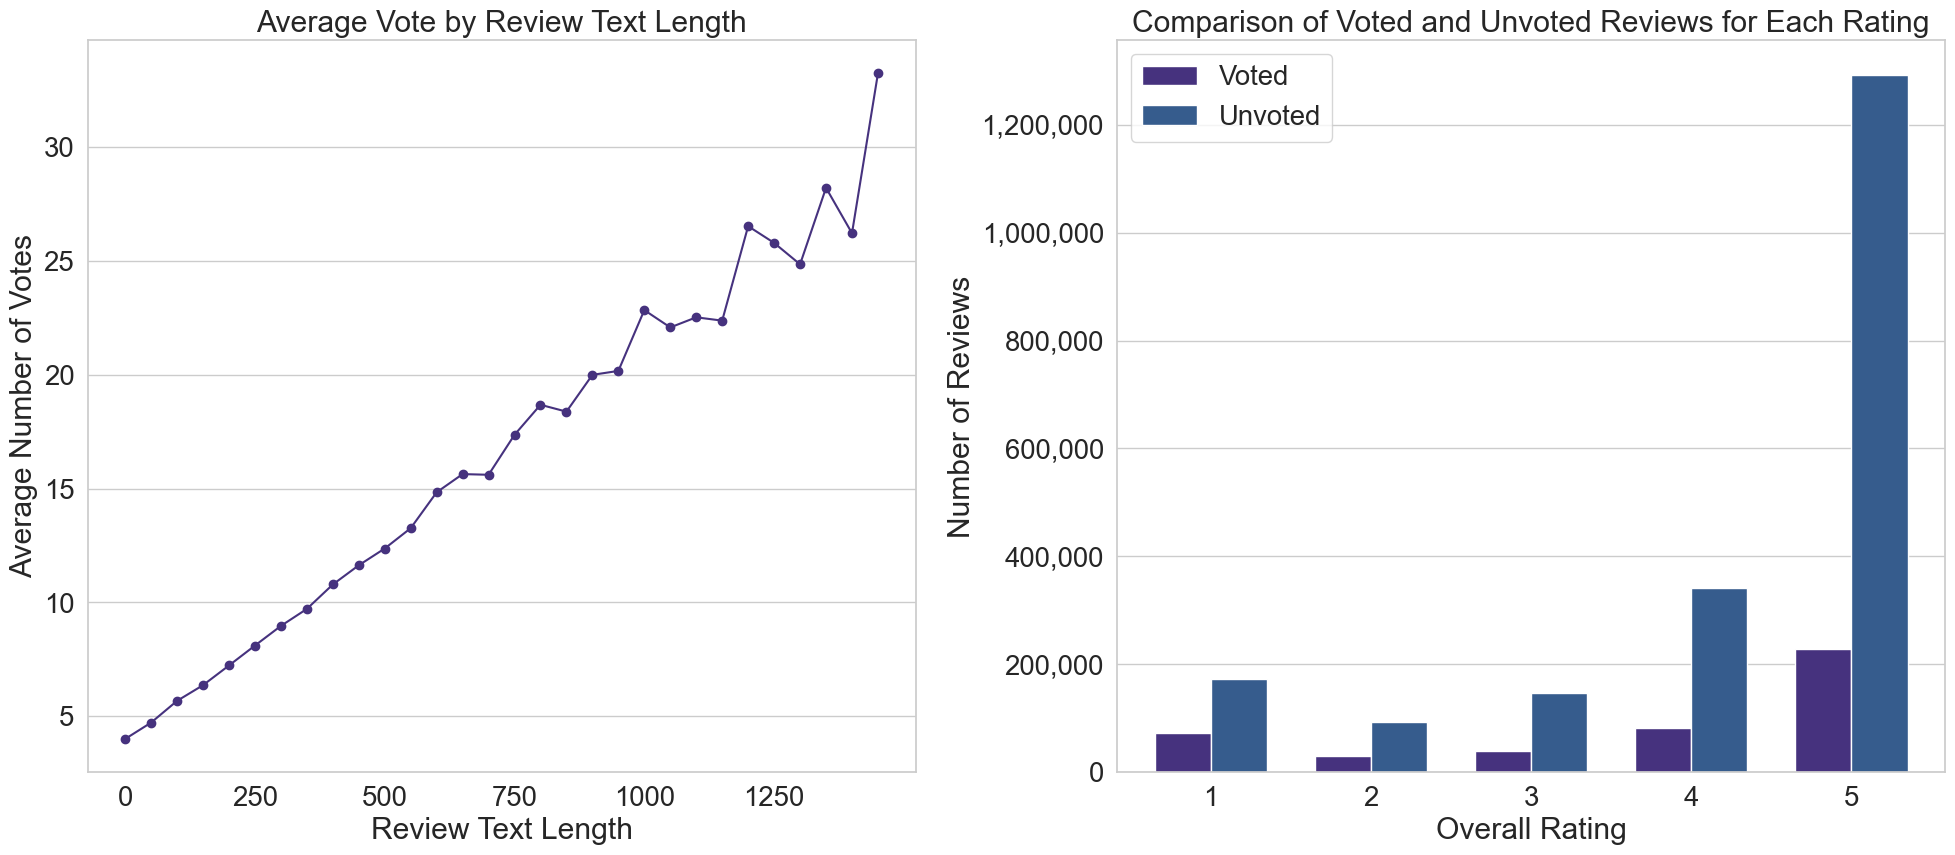

In [144]:
# Set the seaborn style and font scale for larger fonts
sns.set(style="whitegrid", font_scale=1.8)

# Create a figure with two subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))  # Adjusted for side-by-side subplots

# First Subplot: Average Vote by Review Text Length
bins = np.arange(0, df_camera_len['review_length'].max() + 50, 50)
average_vote_by_length = df_camera_len.groupby(pd.cut(df_camera_len['review_length'], bins=bins))['vote'].mean()

average_vote_by_length.plot(marker='o', color=sns.color_palette('viridis')[0], ax=ax1)  
ax1.set_title('Average Vote by Review Text Length')
ax1.set_xlabel('Review Text Length')
ax1.set_ylabel('Average Number of Votes')
ax1.grid(axis='x')
ax1.set_xticks(range(0, len(average_vote_by_length), 5))
ax1.set_xticklabels(bins[:-1:5])

# Second Subplot: Comparison of Voted and Unvoted Reviews for Each Rating
voted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == True].groupby('overall')['is_voted'].count()
unvoted_reviews_count = df_camera_norm[df_camera_norm['is_voted'] == False].groupby('overall')['is_voted'].count()

bar_width = 0.35
index = voted_reviews_count.index
ax2.bar(index - bar_width/2, voted_reviews_count.values, bar_width, label='Voted', color=sns.color_palette('viridis')[0])
ax2.bar(index + bar_width/2, unvoted_reviews_count.values, bar_width, label='Unvoted', color=sns.color_palette('viridis')[1])
ax2.set_xlabel('Overall Rating')
ax2.set_ylabel('Number of Reviews')
ax2.set_title('Comparison of Voted and Unvoted Reviews for Each Rating')
ax2.set_xticks(index)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax2.legend()
ax2.grid(axis='x')
# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


## Product dataset EDA

In [47]:
df_product.head()

,description,title,brand,rank,main_cat,date,price,asin
0,the following camera brands and models have be...,Genuine Geovision 1 Channel 3rd Party NVR IP S...,GeoVision,"['>#3,092 in Tools &amp; Home Improvement &gt;...",Camera & Photo,"January 28, 2014",65.00,0011300000
1,this second edition of the handbook of astrono...,"Books ""Handbook of Astronomical Image Processi...",33 Books Co.,"['>#55,933 in Camera &amp; Photo (See Top 100 ...",Camera & Photo,"June 17, 2003",NaN,0043396828
2,a zesty tale publishers weekly garcia aguilera...,One Hot Summer,Visit Amazon's Carolina Garcia Aguilera Page,"3,105,177 in Books (",Books,NaN,11.49,0060009810
3,NaN,Hurray for Hattie Rabbit: Story and pictures (...,Visit Amazon's Dick Gackenbach Page,"2,024,298 in Books (",Books,NaN,NaN,0060219602
4,sex lies murder fame is brillllli f ing ant lo...,sex.lies.murder.fame.: A Novel,Visit Amazon's Lolita Files Page,"3,778,828 in Books (",Books,NaN,13.95,0060786817


In [103]:
# match the overall rating from review dataset to the product dataset
df_product['overall'] = df_product['asin'].map(df_review.groupby('asin')['overall'].mean())


In [94]:
df_product["main_cat"].value_counts().head(10)

main_cat
Computers                       242894
Camera & Photo                  124886
All Electronics                 119242
Home Audio & Theater            101632
Cell Phones & Accessories        65015
Car Electronics                  22632
Sports & Outdoors                 9887
Office Products                   8244
Portable Audio & Accessories      7874
Tools & Home Improvement          7456
Name: count, dtype: int64

In [95]:
cat_of_interest = 'Camera & Photo'

In [96]:
# calculate the proportion of "Camera & Photo" products in all products
camera_proportion = df_product['main_cat'].value_counts(normalize=True)[cat_of_interest]
camera_proportion

0.16608505997818976

In [97]:
# select the top 30 brands in "Camera & Photo" category
show = 30
top_brands = df_product[df_product['main_cat'] == cat_of_interest]['brand'].value_counts().head(show)
top_brands

brand
Canon              3637
Neewer             3217
Sony               2877
Nikon              2824
Panasonic          1317
Opteka             1300
Olympus            1292
Fujifilm           1205
Vivitar            1058
Kodak              1037
Polaroid           1008
Fotodiox            987
Kastar              916
ButterflyPhoto      858
Manfrotto           858
Synergy Digital     794
Generic             774
Halcyon             772
Samsung             720
Pentax              716
UpStart Battery     700
Sigma               634
LimoStudio          614
DSTE                605
Hoya                594
Digital Nc          571
eCost               565
dCables             552
SSE                 539
JJC                 505
Name: count, dtype: int64

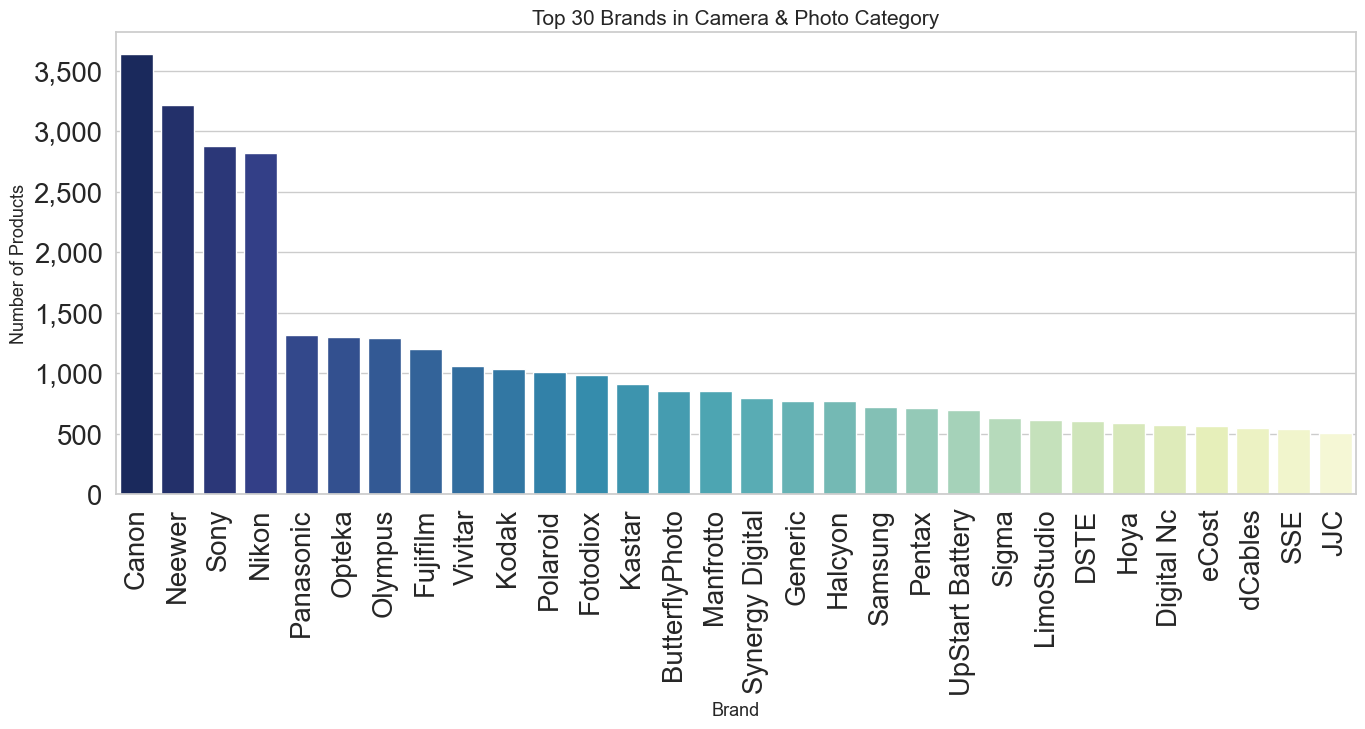

In [147]:
# plot the top 30 brands in "Camera & Photo" category
plt.figure(figsize=(16, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='YlGnBu_r')

plt.xlabel('Brand', fontsize=13 )
plt.ylabel('Number of Products', fontsize=13)
plt.title(f'Top {show} Brands in {cat_of_interest} Category', fontsize=15)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.grid(axis='y', linestyle='-', zorder=0)
plt.gca().set_axisbelow(True)  

plt.show()